In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
#df = pd.read_csv(f'vehicle_speed_statistics_all_models_only_100kmh.csv')

df = df[df['SL_change'] != "No_Change"]
df['PSL'] = df['SL_change'].str.split('_').str[-1]
#df = df.sort_values(by='PSL', ascending=True).reset_index(drop=True)
df['PSL'] = pd.to_numeric(df['PSL'])
print(df)
print(df.dtypes)

Plate         object
SL_change     object
V_15         float64
V_50         float64
V_85         float64
stn_dev      float64
CV           float64
kurtosis     float64
PSL            int64
dtype: object


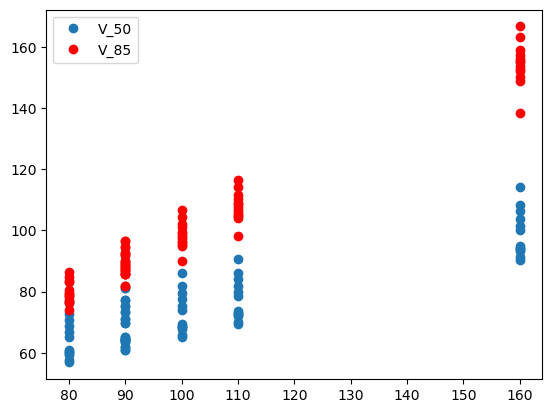

In [52]:
fig, ax = plt.subplots()
#plt.plot(df['PSL'], df['V_15'], 'o', label='V_15')
plt.plot(df['PSL'], df['V_50'],'o', label='V_50')
plt.plot(df['PSL'], df['V_85'],'ro', label='V_85')
plt.legend()

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

vehicles = ['General', 'Car', 'Truck', 'SUV']
percentile = ['50', '85']
for vehicle in vehicles:
    # Assign the appropriate DataFrame based on the vehicle
    if vehicle == 'General':
        df1 = df
    elif vehicle == 'Car':
        df1 = df[df['Plate'].isin([#car license plates go here])].copy()
    elif vehicle == 'Truck':
        df1 = df[df['Plate'] == #truck license plates go here].copy()
    elif vehicle == 'SUV':
        df1 = df[~df['Plate'].isin([#truck and car license plates go here])].copy()
    for percent in percentile:
        # Assuming you have your scatter plot data
        x = df1['PSL']  # independent variable
        y = df1[f'V_{percent}']  # dependent variable
        
        # Scatter plot
        #plt.scatter(x, y, label='Data', color='blue')
        
        # Fit a linear regression line
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        # Calculate the R^2 value
        r_squared = r_value ** 2
        
        # Create the linear line based on the slope and intercept
        y_fit = slope * x + intercept
        
        # Plot the linear line
        #plt.plot(x, y_fit, color='red', label=f'Linear Fit (R² = {r_squared:.2f})')
        
        # Add legend and labels
        #plt.legend()
        #plt.xlabel('PSL')
        #plt.ylabel(f'V_{percent}')
        
        # Show the plot
        #plt.show()
        
        # Output the R² value
        print(f"For {vehicle} at {percent}")
        print(f"R² value: {r_squared}")
        print(f"slope value: {slope}")
        print(f"intercept value: {intercept}")

For General at 50
R² value: 0.7577777759692582
slope value: 0.4332658075526422
intercept value: 29.605862687624757
For General at 85
R² value: 0.9666413929599637
slope value: 0.9338525431937953
intercept value: 5.1645653024942675
For Car at 50
R² value: 0.6359492096425893
slope value: 0.4494117888305284
intercept value: 32.19218086009208
For Car at 85
R² value: 0.9961377937852686
slope value: 0.9270273614080401
intercept value: 6.943120525862668
For Truck at 50
R² value: 1.0
slope value: 0.42421512037916437
intercept value: 25.9967363641997
For Truck at 85
R² value: 1.0
slope value: 0.808731808283981
intercept value: 9.125739171601893
For SUV at 50
R² value: 0.8005177788634059
slope value: 0.43094168001441274
intercept value: 29.4495116854738
For SUV at 85
R² value: 0.974534866813827
slope value: 0.9477296530419278
intercept value: 4.412736870909839
